# **Decision Tree Regression**

### **Importing All Necessary Libraries**

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree

### **Data Framing**

In [2]:
df = pd.read_csv('HR_dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
print(f"data shape: {df.shape}\n") # Checking data shape
print(df.isnull().sum(), "\n") # Checking null values
print(df.describe())

data shape: (14999, 10)

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64 

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   1

### **Preprocessing**

Convert categorical variables to numerical

In [4]:
from sklearn.preprocessing import LabelEncoder
le_dept = LabelEncoder()
le_salary = LabelEncoder()

df['Department'] = le_dept.fit_transform(df['Department'])
df['salary'] = le_salary.fit_transform(df['salary'])
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


### **Extract relevant columns**

In [5]:
X = df.drop('left', axis=1)
y = df['left']

### **Splitting the dataset**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Training the Model**

In [7]:
# Initialize the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the model
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

### **Predict on the test data**

In [8]:
y_pred_regressor = regressor.predict(X_test)

### **Evaluate the model**

In [10]:
mse = mean_squared_error(y_test, y_pred_regressor)
r2 = r2_score(y_test, y_pred_regressor)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.026
R-squared: 0.8555166699185707


The DecisionTreeRegressor model achieved a low Mean Squared Error of 0.026, indicating accurate predictions, and an R-squared value of 0.856, demonstrating a strong fit to the data.

## **Tree Visualization**

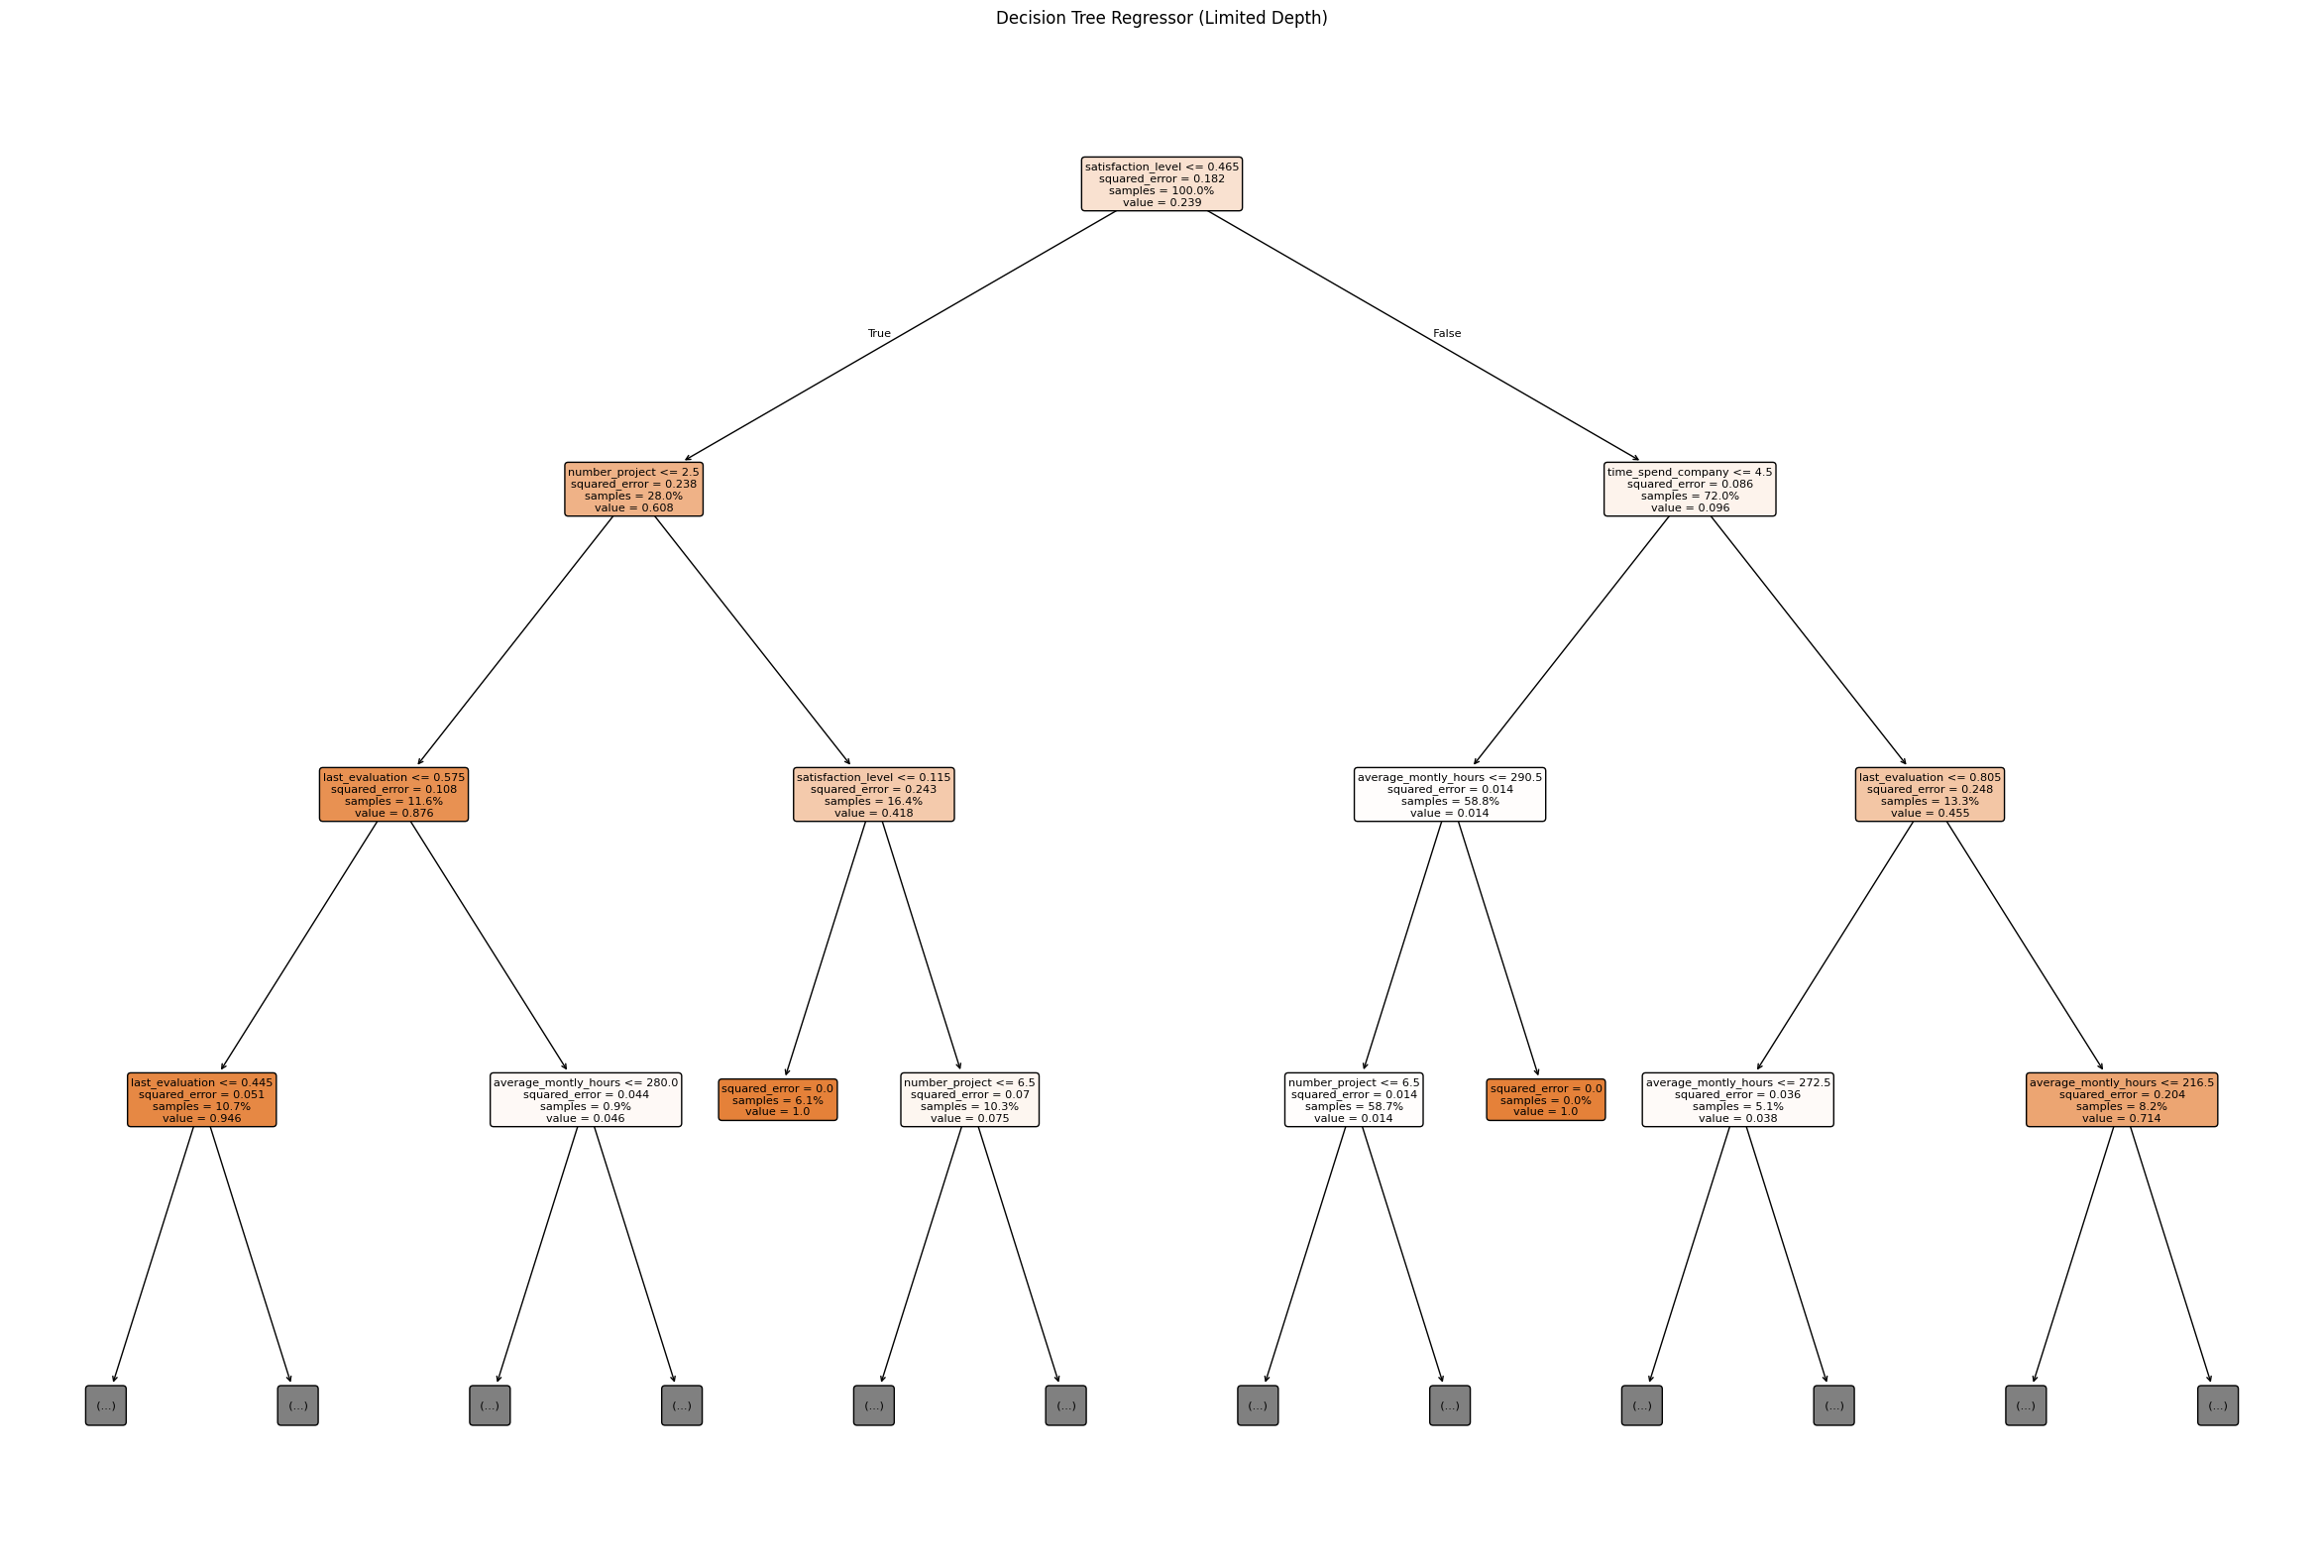

In [18]:
# Visualize the decision tree with increased figure size and limited depth
plt.figure(figsize=(30, 20))
plot_tree(regressor, filled=True, feature_names=X.columns, rounded=True, proportion=True, max_depth=3)
plt.title("Decision Tree Regressor (Limited Depth)")
plt.show()